# Probando la segmentación con operaciones morfológicas

Los pasos a seguir son los mismos que en el Entregable 7, pero en este caso incluiremos la creación de un elemento estructural y la dilatación y posterior erosión de la imagen. Además, se comprueban los mejores thresholds posibles. Los pasos que se repiten no se comentan

In [2]:
import skimage.io
import pandas as pd
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import numpy as np

dirpath = "C:/Users/cdedi/Desktop/Sample/"


def loader(x,vector,names_vector):
    for i in range(6,9,1):
        if i < 10:
            img_now = skimage.io.imread(dirpath + "T00001C0" + str(x) + "Z00" + str(i) + ".tif")
        if i >= 10:
            img_now = skimage.io.imread(dirpath + "T00001C0" + str(x) + "Z0" + str(i) + ".tif")
        vector[i-6] = img_now[(855-12):(855+12),(547-12):(547+12)]

In [3]:
red_vector = [0] * 3
white_vector = [0] * 3
blue_vector = [0] * 3
red_names = [0] * 3
white_names = [0] * 3
blue_names = [0] * 3

loader(1, red_vector, red_names)
loader(2, white_vector, white_names)
loader(3, blue_vector, blue_names)

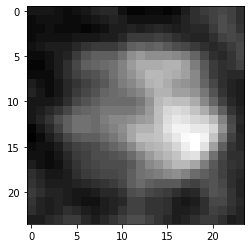

In [38]:
img_gauss_0 = ndi.gaussian_filter(red_vector[0],1)
plt.imshow(img_gauss_0, cmap="gray")
plt.show()

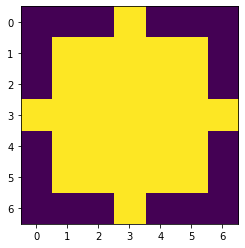

In [36]:
# Create structuring element
i = 7
i2 = 5
SE = (np.mgrid[:i,:i][0] - np.floor(i/2))**2 + (np.mgrid[:i,:i][1] - np.floor(i/2))**2 <= np.floor(i/2)**2
SE2 = (np.mgrid[:i2,:i2][0] - np.floor(i2/2))**2 + (np.mgrid[:i2,:i2][1] - np.floor(i2/2))**2 <= np.floor(i2/2)**2
# Visualize the result
plt.imshow(SE, interpolation='none')
plt.show()

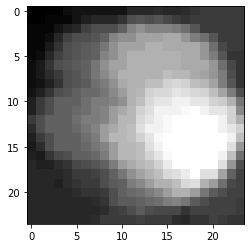

In [6]:
# Realizar paso de dilatación sobre la imagen
from skimage.morphology import erosion, dilation, opening, closing
opened = dilation(img_gauss_0, selem=SE)
plt.imshow(opened,cmap = "gray")
plt.show()

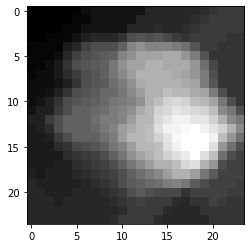

In [7]:
# Realizar paso de erosión sobre la imagen dilatada
from skimage.morphology import erosion, dilation, opening, closing
eroded = erosion(opened, selem=SE2)
plt.imshow(eroded,cmap = "gray")
plt.show()

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 576x360 with 8 Axes>,
 array([<AxesSubplot:title={'center':'Original'}>,
        <AxesSubplot:title={'center':'Isodata'}>,
        <AxesSubplot:title={'center':'Li'}>,
        <AxesSubplot:title={'center':'Mean'}>,
        <AxesSubplot:title={'center':'Minimum'}>,
        <AxesSubplot:title={'center':'Otsu'}>,
        <AxesSubplot:title={'center':'Triangle'}>,
        <AxesSubplot:title={'center':'Yen'}>], dtype=object))

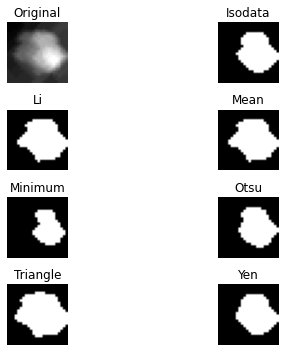

In [8]:
# Observamos todos los threshold de los que dispone scikit-image
skimage.filters.try_all_threshold(eroded)

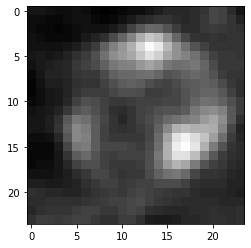

In [9]:
img_gauss_1 = ndi.gaussian_filter(red_vector[1],1)
plt.imshow(img_gauss_1, cmap="gray")
plt.show()

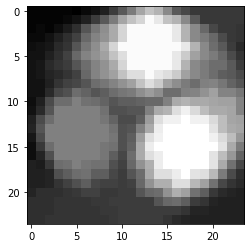

In [10]:
from skimage.morphology import erosion, dilation, opening, closing
opened2 = dilation(img_gauss_1, selem=SE)
plt.imshow(opened2,cmap = "gray")
plt.show()

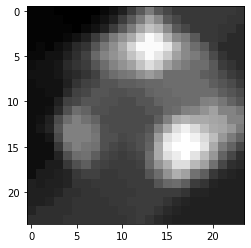

In [11]:
from skimage.morphology import erosion, dilation, opening, closing
eroded2 = erosion(opened2, selem=SE2)
plt.imshow(eroded2,cmap = "gray")
plt.show()

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 576x360 with 8 Axes>,
 array([<AxesSubplot:title={'center':'Original'}>,
        <AxesSubplot:title={'center':'Isodata'}>,
        <AxesSubplot:title={'center':'Li'}>,
        <AxesSubplot:title={'center':'Mean'}>,
        <AxesSubplot:title={'center':'Minimum'}>,
        <AxesSubplot:title={'center':'Otsu'}>,
        <AxesSubplot:title={'center':'Triangle'}>,
        <AxesSubplot:title={'center':'Yen'}>], dtype=object))

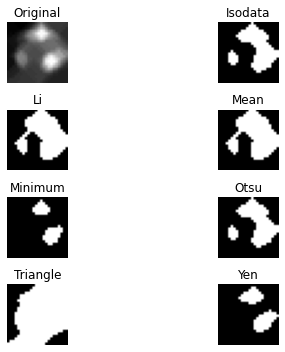

In [12]:
skimage.filters.try_all_threshold(eroded2)

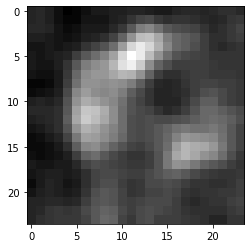

In [13]:
img_gauss_2 = ndi.gaussian_filter(red_vector[2],1)
plt.imshow(img_gauss_2, cmap="gray")
plt.show()

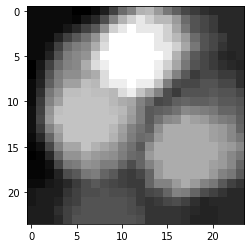

In [14]:
from skimage.morphology import erosion, dilation, opening, closing
opened3 = dilation(img_gauss_2, selem=SE)
plt.imshow(opened3,cmap = "gray")
plt.show()

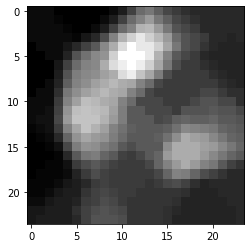

In [15]:
from skimage.morphology import erosion, dilation, opening, closing
eroded3 = erosion(opened3, selem=SE2)
plt.imshow(eroded3,cmap = "gray")
plt.show()

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 576x360 with 8 Axes>,
 array([<AxesSubplot:title={'center':'Original'}>,
        <AxesSubplot:title={'center':'Isodata'}>,
        <AxesSubplot:title={'center':'Li'}>,
        <AxesSubplot:title={'center':'Mean'}>,
        <AxesSubplot:title={'center':'Minimum'}>,
        <AxesSubplot:title={'center':'Otsu'}>,
        <AxesSubplot:title={'center':'Triangle'}>,
        <AxesSubplot:title={'center':'Yen'}>], dtype=object))

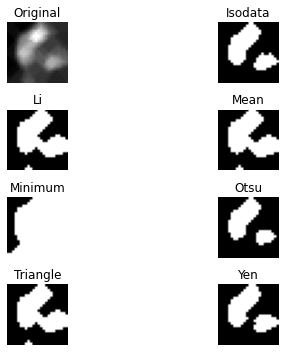

In [16]:
skimage.filters.try_all_threshold(eroded3)

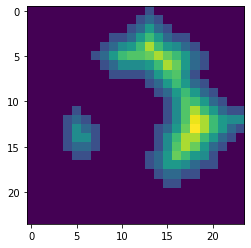

In [39]:
from skimage.filters import threshold_otsu
otsu1 = skimage.filters.threshold_otsu(eroded2)
mask = eroded2 > otsu1
dist_trans = ndi.distance_transform_edt(mask)
plt.imshow(dist_trans)

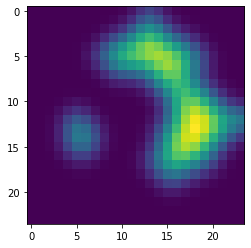

In [40]:
# Applying the filter
dist_trans_smooth = ndi.filters.gaussian_filter(dist_trans, sigma=1)

# Visualizing
plt.imshow(dist_trans_smooth, interpolation='none', cmap='viridis')
plt.show()

In [41]:
from skimage.feature import peak_local_max
seeds = peak_local_max(dist_trans_smooth, indices=False, min_distance=5)

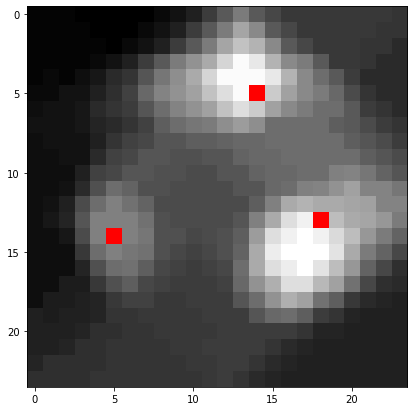

In [43]:
# Dilate seeds
seeds_dil = ndi.filters.maximum_filter(seeds, size=1)

# Create plot
plt.figure(figsize=(7,7))
plt.imshow(eroded2, interpolation='none', cmap='gray')
plt.imshow(np.ma.array(seeds_dil, mask=seeds_dil==0), interpolation='none', cmap='autumn')
plt.show()

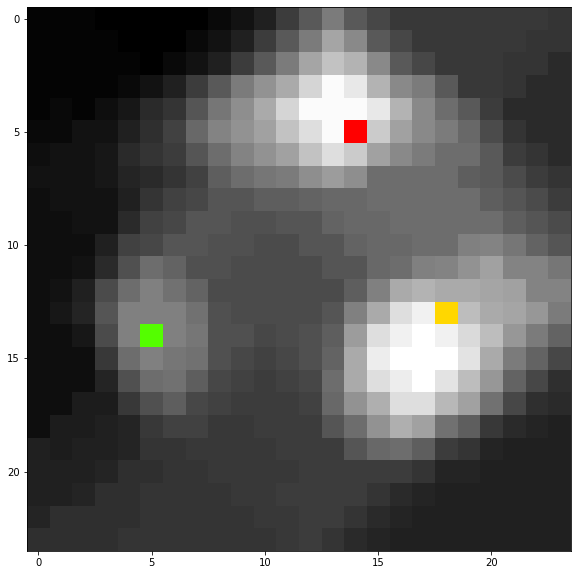

In [44]:
# (vii) Label the seeds

# Use connected component labeling to give each cell seed a unique ID number.
seeds_labeled = ndi.label(seeds)[0]

# Visualize the final result (the labeled seeds) as an overlay on the raw (or smoothed) image
seeds_labeled_dil = ndi.filters.maximum_filter(seeds_labeled, size=1)  # Expand a bit for visualization
plt.figure(figsize=(10,10))
plt.imshow(eroded2, interpolation='none', cmap='gray')
plt.imshow(np.ma.array(seeds_labeled_dil, mask=seeds_labeled_dil==0), interpolation='none', cmap='prism')
plt.show()

In [47]:
from skimage.segmentation import watershed
ws = watershed(eroded2, seeds_labeled, mask = mask)

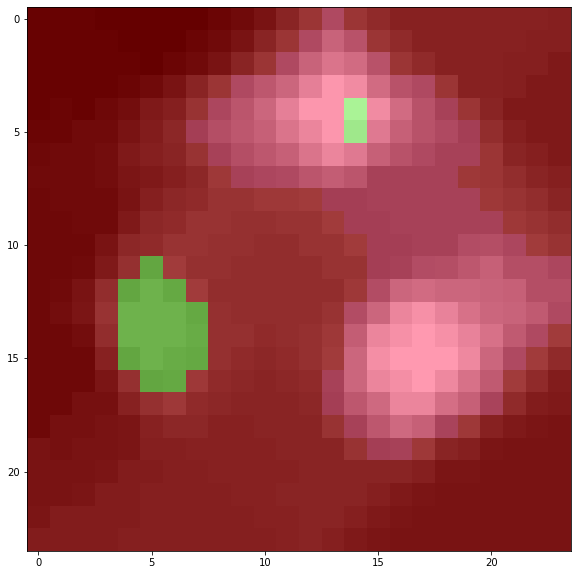

In [48]:
plt.figure(figsize=(10,10))
plt.imshow(eroded2, interpolation='none', cmap='gray')
plt.imshow(ws, interpolation='none', cmap='prism', alpha=0.4)
plt.show()

Podemos observar que en este caso la segmentación por watershed tampoco funciona muy bien. Por tanto, para la segmentación de las células nos valdremos únicamente de las operaciones morfológicas y del threshold (que realizaremos tanto por Otsu como con Li). Los entregables 9 y 10 serán pipelines para aplicar las operaciones morfológicas en 2D y 3D, respectivamente.